## Imports

In [2]:
import pandas as pd
import sys

sys.path.insert(0,'../satori')

from postprocess import *

## Interaction data processing

In [5]:
exp_name = "../results/human_promoters/SPLIT_NEW/baseline/E1/"

interaction_file = "Interactions_SATORI/interactions_summary_attnLimit-0.02999554731674315.txt"

In [44]:
# For SATORI based interactions
df,suffix = pd.read_csv(exp_name + interaction_file ,sep='\t'),'SATORI'
output_path = exp_name
##df = pd.read_csv('../results/Human_Promoter_Analysis_euclidean_v8/Interactions_SATORI/interactions_summary_attnLimit-0.04.txt',sep='\t')

# For FIS based interactions
#df,suffix = pd.read_csv(exp_name + '/Interactions_FIS/interactions_summary_attnLimit-0.txt',sep='\t'),'FIS'
#df = pd.read_csv('../results/Human_Promoter_Analysis_euclidean_v8_fixed/Interactions_FIS/interactions_summary_attnLimit-0.txt',sep='\t')

### Filter based on interaction and motif hit p-values, and keep the most significant interactions

In [45]:
df = filter_data_on_thresholds(df, motifA_pval_cutoff=0.05, motifB_pval_cutoff=0.05)

In [46]:
df.shape

(9, 12)

### Load the motif description file to annotate the interactions. 
Here we use CISBP (U toronto) motif description file. 

In [9]:
fhd_file = "/s/chromatin/k/nobackup/p/altsplice1/fahad/DeepLearning/Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt"

df_annotate = pd.read_csv(fhd_file,sep='\t')

In [10]:
df_annotate.head()

,TF_ID,Family_ID,TSource_ID,Motif_ID,MSource_ID,DBID,TF_Name,TF_Species,TF_Status,Family_Name,...,MSource_Type,MSource_Author,MSource_Year,PMID,MSource_Version,TfSource_Name,TfSource_URL,TfSource_Year,TfSource_Month,TfSource_Day
0,T004843_1.02,F035_1.02,TS19_1.02,M2938_1.02,MS26_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,Transfac,Matys,2006,16381825,2014.2,Ensembl,http://www.ensembl.org/,2011,Oct,26
1,T004843_1.02,F035_1.02,TS19_1.02,M5917_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
2,T004843_1.02,F035_1.02,TS19_1.02,M5918_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
3,T004843_1.02,F035_1.02,TS19_1.02,M5919_1.02,MS20_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,SELEX,Jolma,2013,23332764,January 2013,Ensembl,http://www.ensembl.org/,2011,Oct,26
4,T004843_1.02,F035_1.02,TS19_1.02,M6144_1.02,MS18_1.02,ENSG00000008196,TFAP2B,Homo_sapiens,D,AP-2,...,HocoMoco,Kulakovskiy,2013,23175603,July 2014,Ensembl,http://www.ensembl.org/,2011,Oct,26


### Annotate the interacting motifs

In [47]:
df['TF1'] = df['motif1'].apply(get_annotation, annotation_data=df_annotate, single_TF=True)
df['TF2'] = df['motif2'].apply(get_annotation, annotation_data=df_annotate, single_TF=True)

In [48]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2
107,filter1<-->filter42,239,M0891_1.02,0.001082,M6482_1.02,0.001694,192.0,168.0,270.0,227.0,1.304787e-05,0.035390,TLX2,SP7
441,filter11<-->filter42,2164,M1605_1.02,0.005833,M6482_1.02,0.001694,132.0,174.0,215.0,138.0,1.448632e-06,0.012849,SOX1,SP7
1215,filter30<-->filter42,5546,M0436_1.02,0.020567,M6482_1.02,0.001694,54.0,18.0,155.0,183.0,1.960240e-05,0.038636,ZNF35,SP7
1490,filter42<-->filter52,7506,M6482_1.02,0.001694,M1592_1.02,0.041647,48.0,276.0,294.0,227.0,9.270391e-06,0.034580,SP7,SOX3
1495,filter42<-->filter61,7515,M6482_1.02,0.001694,M0608_1.02,0.009073,180.0,252.0,422.0,237.0,1.181393e-07,0.002096,SP7,MLL


In [49]:
df['TF_Interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

### Drop same motif interactions

In [50]:
df = df[df['TF1']!=df['TF2']]

In [51]:
df.shape

(9, 15)

In [52]:
df = df.reset_index(drop=True)

### Fix redundant interaction pairs

In [53]:
df = process_for_redundant_interactions(df, intr_type='TF')

In [54]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction
0,filter1<-->filter42,239,M0891_1.02,0.001082,M6482_1.02,0.001694,192.0,168.0,270.0,227.0,1.304787e-05,0.035390,TLX2,SP7,TLX2$\longleftrightarrow$SP7
1,filter11<-->filter42,2164,M1605_1.02,0.005833,M6482_1.02,0.001694,132.0,174.0,215.0,138.0,1.448632e-06,0.012849,SOX1,SP7,SOX1$\longleftrightarrow$SP7
2,filter30<-->filter42,5546,M0436_1.02,0.020567,M6482_1.02,0.001694,54.0,18.0,155.0,183.0,1.960240e-05,0.038636,ZNF35,SP7,ZNF35$\longleftrightarrow$SP7
3,filter42<-->filter52,7506,M6482_1.02,0.001694,M1592_1.02,0.041647,48.0,276.0,294.0,227.0,9.270391e-06,0.034580,SP7,SOX3,SP7$\longleftrightarrow$SOX3
4,filter42<-->filter61,7515,M6482_1.02,0.001694,M0608_1.02,0.009073,180.0,252.0,422.0,237.0,1.181393e-07,0.002096,SP7,MLL,SP7$\longleftrightarrow$MLL


In [55]:
df.shape

(9, 15)

## Most Frequent TF Family Interactions

In [56]:
tf_family_dict = {}
for TF in df_annotate['TF_Name']:
    tf_family_dict[TF] = df_annotate[df_annotate['TF_Name']==TF]['Family_Name'].iloc[0]
df['TF1_Family'] = df['TF1'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')
df['TF2_Family'] = df['TF2'].apply(lambda x: tf_family_dict[x] if x in tf_family_dict else 'UNKNOWN')

In [57]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [58]:
df = process_for_redundant_interactions(df, intr_type='Family')

In [59]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter1<-->filter42,239,M0891_1.02,0.001082,M6482_1.02,0.001694,192.0,168.0,270.0,227.0,1.304787e-05,0.035390,TLX2,SP7,TLX2$\longleftrightarrow$SP7,Homeodomain,C2H2 ZF,Homeodomain$\longleftrightarrow$C2H2 ZF
1,filter11<-->filter42,2164,M1605_1.02,0.005833,M6482_1.02,0.001694,132.0,174.0,215.0,138.0,1.448632e-06,0.012849,SOX1,SP7,SOX1$\longleftrightarrow$SP7,Sox,C2H2 ZF,Sox$\longleftrightarrow$C2H2 ZF
2,filter30<-->filter42,5546,M0436_1.02,0.020567,M6482_1.02,0.001694,54.0,18.0,155.0,183.0,1.960240e-05,0.038636,ZNF35,SP7,ZNF35$\longleftrightarrow$SP7,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF
3,filter42<-->filter52,7506,M6482_1.02,0.001694,M1592_1.02,0.041647,48.0,276.0,294.0,227.0,9.270391e-06,0.034580,SP7,SOX3,SP7$\longleftrightarrow$SOX3,C2H2 ZF,Sox,Sox$\longleftrightarrow$C2H2 ZF
4,filter42<-->filter61,7515,M6482_1.02,0.001694,M0608_1.02,0.009073,180.0,252.0,422.0,237.0,1.181393e-07,0.002096,SP7,MLL,SP7$\longleftrightarrow$MLL,C2H2 ZF,CxxC,C2H2 ZF$\longleftrightarrow$CxxC


In [60]:
df['filter_interaction'] = df['filter_interaction'].apply(lambda x: x.replace('<-->',r'$\longleftrightarrow$'))

In [61]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter1$\longleftrightarrow$filter42,239,M0891_1.02,0.001082,M6482_1.02,0.001694,192.0,168.0,270.0,227.0,1.304787e-05,0.035390,TLX2,SP7,TLX2$\longleftrightarrow$SP7,Homeodomain,C2H2 ZF,Homeodomain$\longleftrightarrow$C2H2 ZF
1,filter11$\longleftrightarrow$filter42,2164,M1605_1.02,0.005833,M6482_1.02,0.001694,132.0,174.0,215.0,138.0,1.448632e-06,0.012849,SOX1,SP7,SOX1$\longleftrightarrow$SP7,Sox,C2H2 ZF,Sox$\longleftrightarrow$C2H2 ZF
2,filter30$\longleftrightarrow$filter42,5546,M0436_1.02,0.020567,M6482_1.02,0.001694,54.0,18.0,155.0,183.0,1.960240e-05,0.038636,ZNF35,SP7,ZNF35$\longleftrightarrow$SP7,C2H2 ZF,C2H2 ZF,C2H2 ZF$\longleftrightarrow$C2H2 ZF
3,filter42$\longleftrightarrow$filter52,7506,M6482_1.02,0.001694,M1592_1.02,0.041647,48.0,276.0,294.0,227.0,9.270391e-06,0.034580,SP7,SOX3,SP7$\longleftrightarrow$SOX3,C2H2 ZF,Sox,Sox$\longleftrightarrow$C2H2 ZF
4,filter42$\longleftrightarrow$filter61,7515,M6482_1.02,0.001694,M0608_1.02,0.009073,180.0,252.0,422.0,237.0,1.181393e-07,0.002096,SP7,MLL,SP7$\longleftrightarrow$MLL,C2H2 ZF,CxxC,C2H2 ZF$\longleftrightarrow$CxxC


In [62]:
df.to_csv(f'{output_path}/Human-Promoter_interactions_{suffix}.csv')

### Distribution of individual TF or TF family interactions

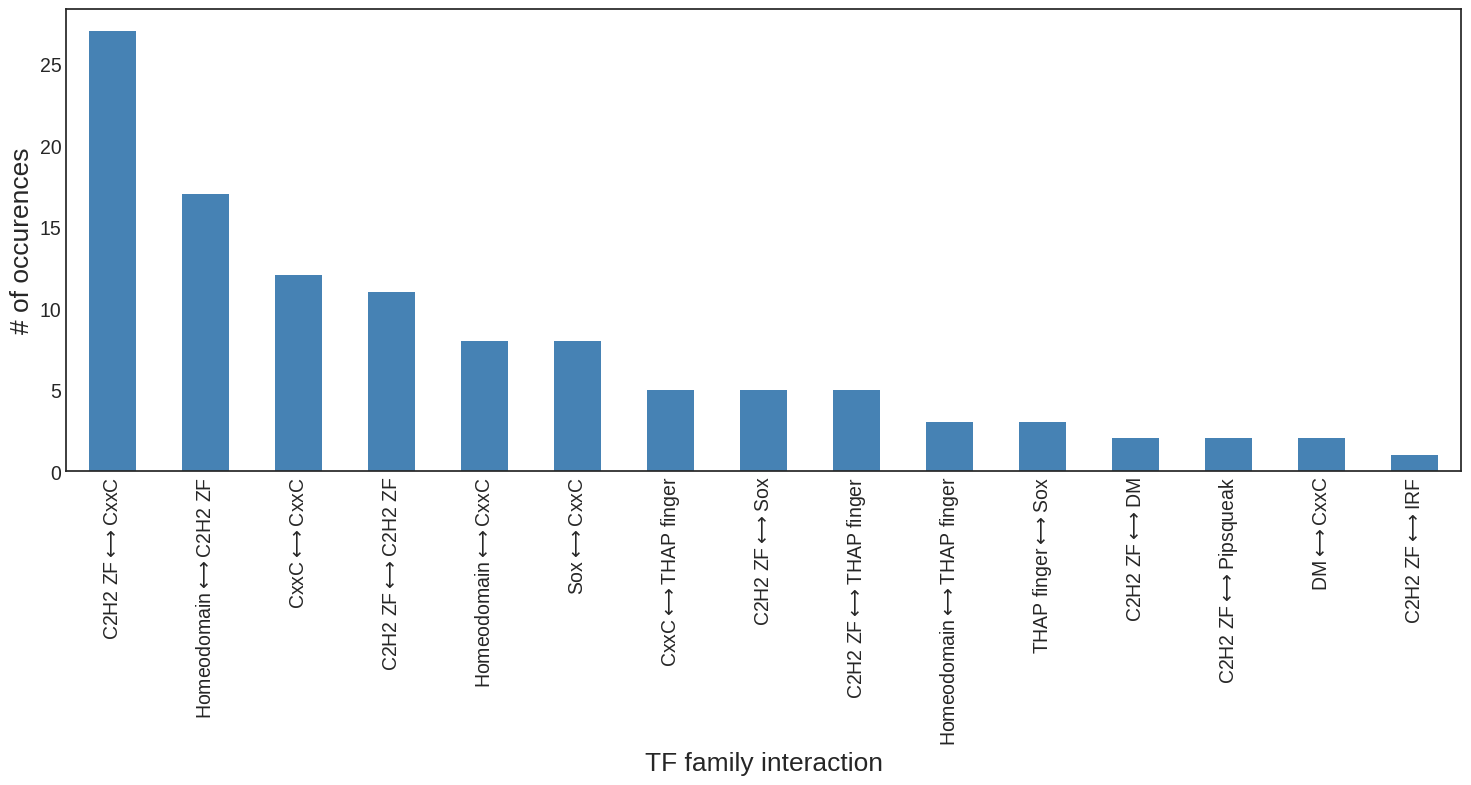

In [24]:
plot_frequent_interactions(df, intr_level='Family_Interaction', first_n=15, store_pdf_path=f'{output_path}/Human_TF-Fams_supp_{suffix}.pdf')

### Plot interaction distance distribution

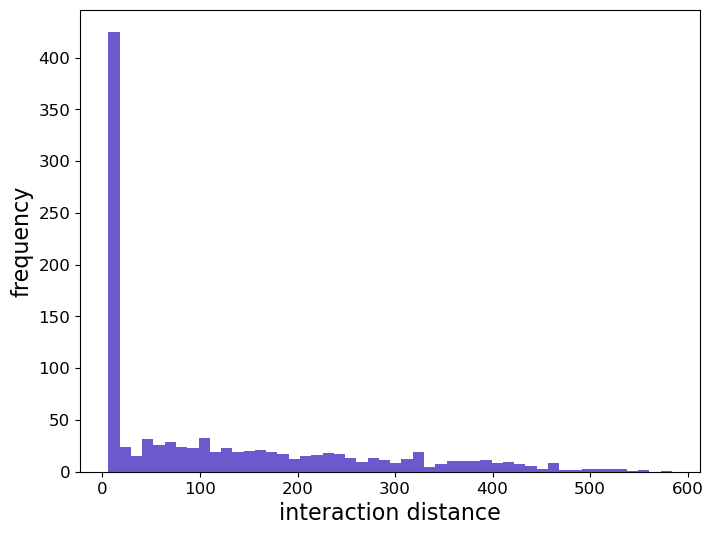

In [28]:
plot_interaction_distance_distribution(df, nbins=50, fig_size=(8,6))

In [29]:
df['mean_distance'].mean(), df['mean_distance'].median()

(122.18642447418738, 64.0)

### Most frequent interactions and their respective interaction distances

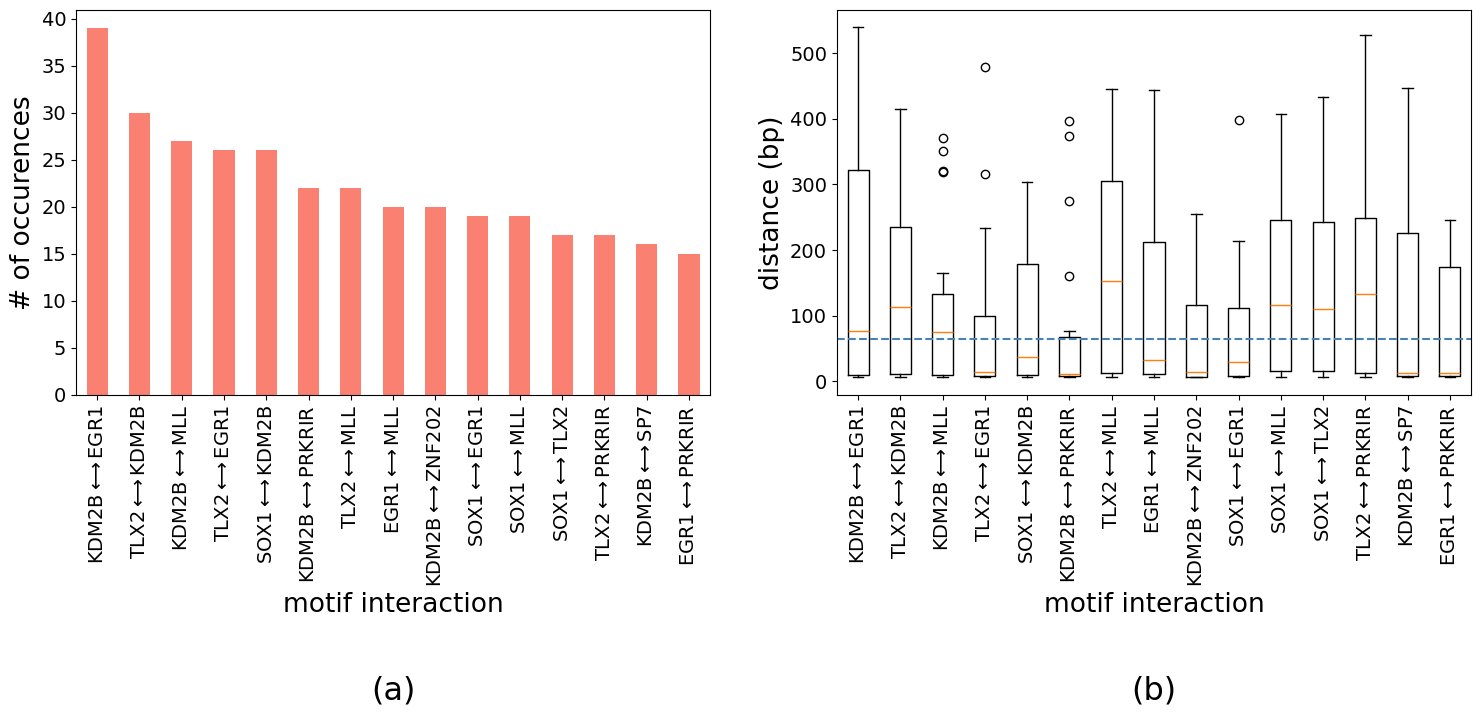

In [30]:
plot_interactions_and_distances_boxplot(df, first_n=15, sort_distances=False, add_sub_caption=True, show_median_dist=True, store_pdf_path=f'{output_path}/human_promoter_main_distance_boxplot_{suffix}.pdf')

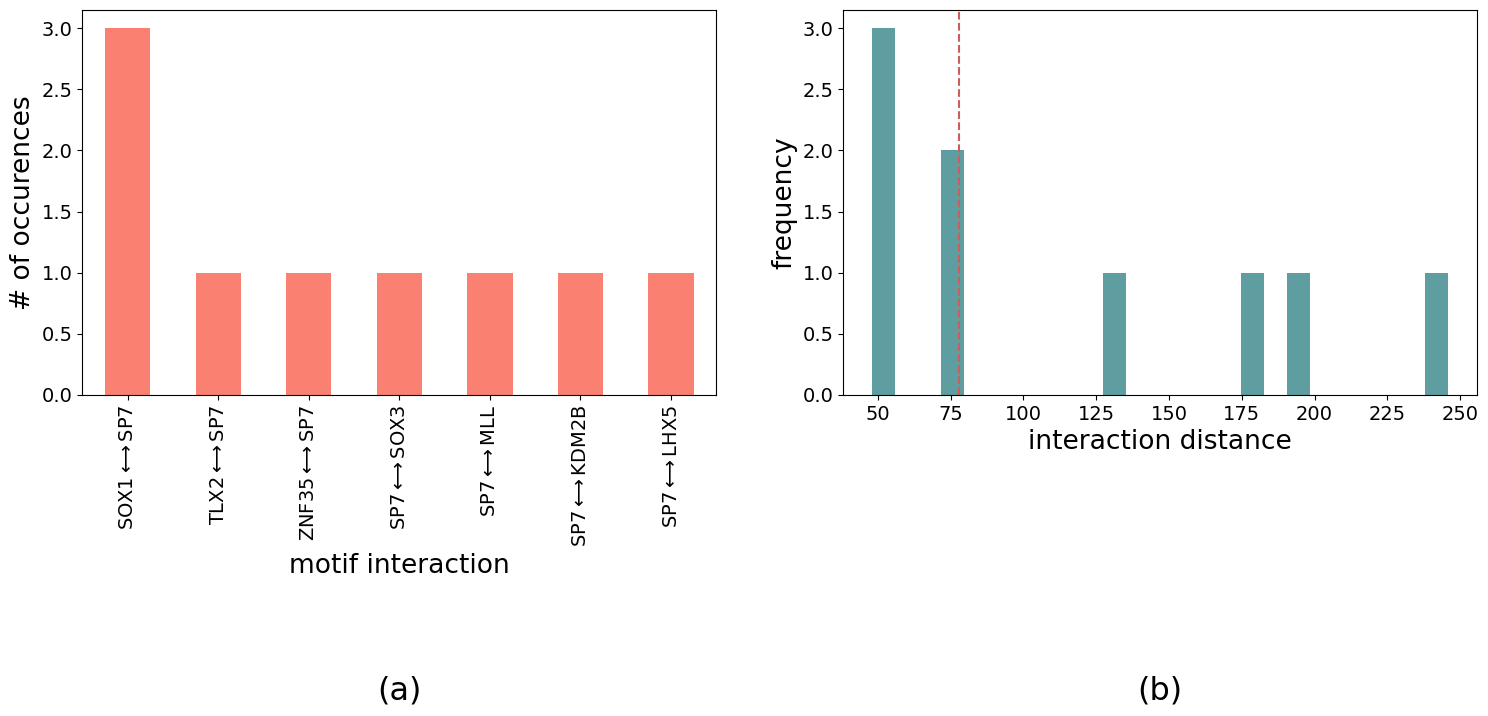

In [77]:
plot_interactions_and_distances_histogram(df, first_n=15, dist_nbins=25, add_sub_caption=True, show_median_dist=True, store_pdf_path=f'{output_path}/human_promoter_main_distance_histogram_{suffix}.pdf')

### Annotate Interactions using TRRUSTv2 (and other sources)

#### Read TRRUSTv2 interactions

In [63]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/chromatin/p/nobackup/Saira/motif_databases/Human_Chromatin/TrustV2/human_co-regulate_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

In [64]:
df['Interaction_in_TRUSTv2'] = df['TF_Interaction'].apply(db_annotate_interaction, intr_dict = human_dict)

In [65]:
df_resTRUSTv2 = df[df['Interaction_in_TRUSTv2']==1]

In [66]:
df_resTRUSTv2x = df_resTRUSTv2[['TF_Interaction','TF1_Family','TF2_Family','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_Interaction')

In [67]:
df_resTRUSTv2x

,TF_Interaction,TF1_Family,TF2_Family,adjusted_pval


In [68]:
df_resTRUSTv2x.to_csv(f'{output_path}/Human_ATTN_TRRUSTv2_{suffix}.csv')

### Annotate Interactions using HIPPIE database

#### Read hippie interactions

In [69]:
#dictionaries with genes/TFs as keys and [target_gene/TF, role, PUBMID ID] as value
with open('/s/chromatin/p/nobackup/Saira/motif_databases/Human_Chromatin/hippie/interactions_dict.pckl','rb') as f:
    human_dict = pickle.load(f)

In [70]:
len(human_dict.keys())

13744

In [71]:
for key,value in human_dict.items():
    human_dict[key] = np.array([[val, '', '0'] for val in value])

In [72]:
df['Interaction_in_HIPPIE'] = df['TF_Interaction'].apply(db_annotate_interaction, intr_dict = human_dict)

In [73]:
df_resHIPPIE = df[df['Interaction_in_HIPPIE']==1]

In [74]:
df_resHIPPIEx = df_resHIPPIE[['TF_Interaction','TF1_Family','TF2_Family','adjusted_pval']].sort_values(by='adjusted_pval').drop_duplicates('TF_Interaction')

In [75]:
df_resHIPPIEx

,TF_Interaction,TF1_Family,TF2_Family,adjusted_pval


In [76]:
df_resHIPPIEx.to_csv(f'{output_path}/Human_ATTN_HIPPIE_{suffix}.csv')